In [1]:
import pandas as pd
import plotnine as p9

In [2]:
dim_teachers = pd.read_parquet("data/dim_teachers.parquet")
dim_teachers['data_entrada'] = pd.to_datetime(dim_teachers['data_entrada'])

In [3]:
# Criando uma coluna que verifique a quantidade de colunas preenchidas
dim_teachers['colunas_preenchidas'] = (dim_teachers.notna().sum(axis=1)) / dim_teachers.shape[1]
dim_teachers.head(100)

,unique_id,profid,utm_origin,tela_origem,estado,total_alunos,login_google,currentstage,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas
0,f1dbcf6e-700a-4a9b-aa78-4c53270f929e,None,Landing Page,Tela inicial,MG,30.0,NaN,fundii,1,[fundii],None,[1],NaN,2023-03-20 14:44:46.242000+00:00,0.714286
1,0da949a1-b3be-4e4e-8303-b9319d0475ff,None,Landing Page,Tela inicial,PE,40.0,NaN,em,5,[em],[5],None,NaN,2022-11-03 07:51:06.504000+00:00,0.714286
2,a8115c6f-28d9-4231-aae9-f263f08b1919,None,Landing Page,Tela inicial,MT,0.0,NaN,em,4,"[em, fundii]","[6, 4]",[6],NaN,2023-02-28 13:40:05.051000+00:00,0.785714
3,a67cc2f5-95b5-4cb5-9a5b-3766de9be130,None,Landing Page,Tela inicial,MS,30.0,NaN,fundii,1,"[em, fundii]",[1],[1],NaN,2022-08-08 14:23:16.965000+00:00,0.785714
4,99bcf296-626c-488e-901a-5cf6a4525fcf,None,Não identificado,Tela inicial,SP,0.0,NaN,fundii,4,[fundii],None,[4],1.0,2023-07-15 20:17:07.976000+00:00,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0cb95d86-11a8-40e7-aa21-66e1f3ed6a6f,None,Landing Page,Tela inicial,None,NaN,NaN,None,None,None,None,None,NaN,2022-08-31 14:13:52.176000+00:00,0.285714
96,1b6980c5-343a-4f94-9d64-a7c747de5f2e,None,SEO Orgânico,Aula SEO,None,NaN,NaN,None,None,None,None,None,NaN,2025-07-24 22:18:13.393000+00:00,0.285714
97,1de72d76-7b3a-4a92-a26e-f00ee67b1456,None,Não identificado,Tela inicial,None,11.0,NaN,fundii,6,[fundii],None,[6],NaN,2022-04-27 18:34:34.393000+00:00,0.642857
98,1fa660fb-f502-47cd-b5f2-45b24c4ecf0d,None,Landing Page,Aula,None,NaN,NaN,fundii,4,[fundii],None,[4],NaN,2022-10-06 15:13:16.600000+00:00,0.571429


In [4]:
dim_teachers['data_semana_entrada'] = dim_teachers['data_entrada'].dt.date - pd.to_timedelta(dim_teachers['data_entrada'].dt.weekday, unit='d')

/var/folders/kd/9dcr76gj6r54_pq8wpxx3k300000gn/T/ipykernel_91822/432090275.py:1: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.


In [5]:
# Criar nova coluna mapeando as faixas de completude de 'colunas_preenchidas' de 20 em 20% com
def map_faixa_completude(valor):
    if valor < 0.2:
        return '0-20%'
    elif valor < 0.4:
        return '20-40%'
    elif valor < 0.6:
        return '40-60%'
    elif valor < 0.8:
        return '60-80%'
    else:
        return '80-100%'

dim_teachers['faixa_completude'] = dim_teachers['colunas_preenchidas'].apply(map_faixa_completude)

In [6]:
# Mapa de cores para plots (índices 0..5)
color_map = {
    0: "#812EBB",  # Primária
    1: "#D03384",  # Secundária
    2: "#2DBE82",  # Verde esmeralda
    3: "#2CAAD6",  # Azul turquesa
    4: "#F4B93C",  # Amarelo dourado
    5: "#E85C4A",  # Vermelho coral
}

def map_cor_completude(faixa):
    if faixa == '0-20%':
        return color_map[4]
    elif faixa == '20-40%':
        return color_map[3]
    elif faixa == '40-60%':
        return color_map[2]
    elif faixa == '60-80%':
        return color_map[1]
    else:
        return color_map[0]

dim_teachers['cor_completude'] = dim_teachers['faixa_completude'].apply(map_cor_completude)

In [7]:
dim_teachers.head()

,unique_id,profid,utm_origin,tela_origem,estado,total_alunos,login_google,currentstage,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas,data_semana_entrada,faixa_completude,cor_completude
0,f1dbcf6e-700a-4a9b-aa78-4c53270f929e,None,Landing Page,Tela inicial,MG,30.0,NaN,fundii,1,[fundii],None,[1],NaN,2023-03-20 14:44:46.242000+00:00,0.714286,2023-03-20,60-80%,#D03384
1,0da949a1-b3be-4e4e-8303-b9319d0475ff,None,Landing Page,Tela inicial,PE,40.0,NaN,em,5,[em],[5],None,NaN,2022-11-03 07:51:06.504000+00:00,0.714286,2022-10-31,60-80%,#D03384
2,a8115c6f-28d9-4231-aae9-f263f08b1919,None,Landing Page,Tela inicial,MT,0.0,NaN,em,4,"[em, fundii]","[6, 4]",[6],NaN,2023-02-28 13:40:05.051000+00:00,0.785714,2023-02-27,60-80%,#D03384
3,a67cc2f5-95b5-4cb5-9a5b-3766de9be130,None,Landing Page,Tela inicial,MS,30.0,NaN,fundii,1,"[em, fundii]",[1],[1],NaN,2022-08-08 14:23:16.965000+00:00,0.785714,2022-08-08,60-80%,#D03384
4,99bcf296-626c-488e-901a-5cf6a4525fcf,None,Não identificado,Tela inicial,SP,0.0,NaN,fundii,4,[fundii],None,[4],1.0,2023-07-15 20:17:07.976000+00:00,0.785714,2023-07-10,60-80%,#D03384


In [8]:
fct_teachers_contents_interactions = pd.read_parquet("data/fct_teachers_contents_interactions.parquet")
interactions = fct_teachers_contents_interactions.groupby(['unique_id']).size().reset_index(name='interactions_count')
interactions.head()

,unique_id,interactions_count
0,000005b8-e073-4b3d-858a-cc2a51f6ae76,1
1,00000ac4-2412-4cba-a7fd-000271cd2459,1
2,00001d14-1398-4e03-b1b7-561cb2d2423a,1
3,00003562-eb2f-481b-a082-f30dc8cb3d4a,1
4,00003a13-91d1-46bf-934d-72f17f4c5a12,1


In [9]:
teachers = dim_teachers.merge(interactions, on='unique_id', how='left')
teachers.head()

,unique_id,profid,utm_origin,tela_origem,estado,total_alunos,login_google,currentstage,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas,data_semana_entrada,faixa_completude,cor_completude,interactions_count
0,f1dbcf6e-700a-4a9b-aa78-4c53270f929e,None,Landing Page,Tela inicial,MG,30.0,NaN,fundii,1,[fundii],None,[1],NaN,2023-03-20 14:44:46.242000+00:00,0.714286,2023-03-20,60-80%,#D03384,1.0
1,0da949a1-b3be-4e4e-8303-b9319d0475ff,None,Landing Page,Tela inicial,PE,40.0,NaN,em,5,[em],[5],None,NaN,2022-11-03 07:51:06.504000+00:00,0.714286,2022-10-31,60-80%,#D03384,2.0
2,a8115c6f-28d9-4231-aae9-f263f08b1919,None,Landing Page,Tela inicial,MT,0.0,NaN,em,4,"[em, fundii]","[6, 4]",[6],NaN,2023-02-28 13:40:05.051000+00:00,0.785714,2023-02-27,60-80%,#D03384,27.0
3,a67cc2f5-95b5-4cb5-9a5b-3766de9be130,None,Landing Page,Tela inicial,MS,30.0,NaN,fundii,1,"[em, fundii]",[1],[1],NaN,2022-08-08 14:23:16.965000+00:00,0.785714,2022-08-08,60-80%,#D03384,2.0
4,99bcf296-626c-488e-901a-5cf6a4525fcf,None,Não identificado,Tela inicial,SP,0.0,NaN,fundii,4,[fundii],None,[4],1.0,2023-07-15 20:17:07.976000+00:00,0.785714,2023-07-10,60-80%,#D03384,4.0


In [10]:
semanais = teachers.groupby(['data_semana_entrada']).size().reset_index(name='cadastros_count')
semanais['data_semana_entrada'] = pd.to_datetime(semanais['data_semana_entrada'])

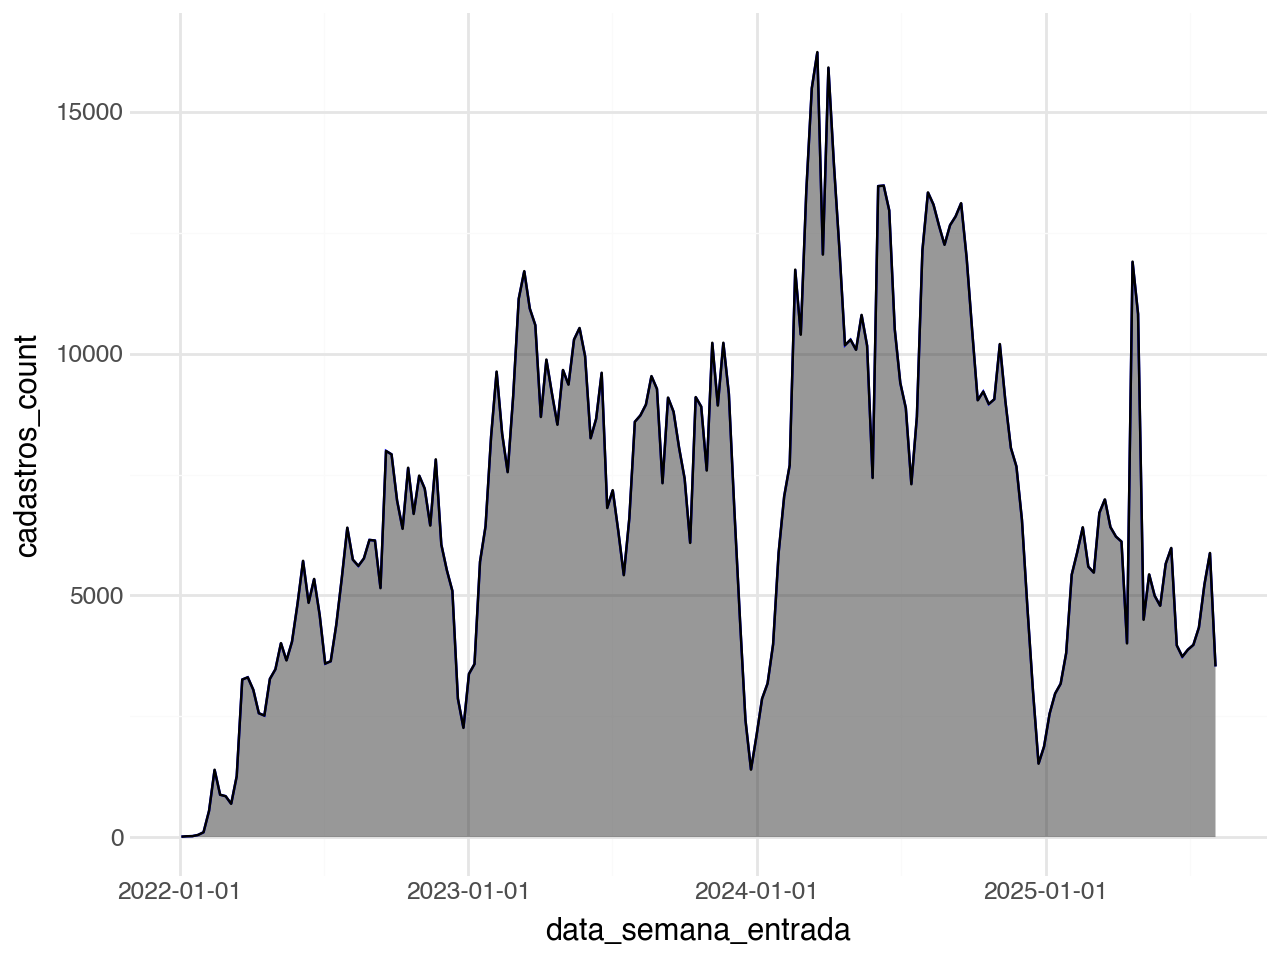

In [11]:
# Plotando um gráfico de área com plotnine para mostrar a quantidade de cadastros ao longo das semanas
plot = (
    p9.ggplot(semanais, p9.aes(x='data_semana_entrada', y='cadastros_count')) +
    p9.geom_area(color='blue', alpha=0.5) +
    p9.geom_line(color='black') +
    p9.theme_minimal()
)
plot

In [12]:
teachers['usuario_valido'] = teachers['selectedstages'].notna()

In [13]:
# teachers.to_parquet("../data/teachers.parquet", index=False)

In [14]:
teachers.head()

,unique_id,profid,utm_origin,tela_origem,estado,total_alunos,login_google,currentstage,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas,data_semana_entrada,faixa_completude,cor_completude,interactions_count,usuario_valido
0,f1dbcf6e-700a-4a9b-aa78-4c53270f929e,None,Landing Page,Tela inicial,MG,30.0,NaN,fundii,1,[fundii],None,[1],NaN,2023-03-20 14:44:46.242000+00:00,0.714286,2023-03-20,60-80%,#D03384,1.0,True
1,0da949a1-b3be-4e4e-8303-b9319d0475ff,None,Landing Page,Tela inicial,PE,40.0,NaN,em,5,[em],[5],None,NaN,2022-11-03 07:51:06.504000+00:00,0.714286,2022-10-31,60-80%,#D03384,2.0,True
2,a8115c6f-28d9-4231-aae9-f263f08b1919,None,Landing Page,Tela inicial,MT,0.0,NaN,em,4,"[em, fundii]","[6, 4]",[6],NaN,2023-02-28 13:40:05.051000+00:00,0.785714,2023-02-27,60-80%,#D03384,27.0,True
3,a67cc2f5-95b5-4cb5-9a5b-3766de9be130,None,Landing Page,Tela inicial,MS,30.0,NaN,fundii,1,"[em, fundii]",[1],[1],NaN,2022-08-08 14:23:16.965000+00:00,0.785714,2022-08-08,60-80%,#D03384,2.0,True
4,99bcf296-626c-488e-901a-5cf6a4525fcf,None,Não identificado,Tela inicial,SP,0.0,NaN,fundii,4,[fundii],None,[4],1.0,2023-07-15 20:17:07.976000+00:00,0.785714,2023-07-10,60-80%,#D03384,4.0,True


In [15]:
interacoes_data = teachers.groupby(['data_semana_entrada','faixa_completude']).agg({'interactions_count': 'sum'}).reset_index()
interacoes_data['data_semana_entrada'] = pd.to_datetime(interacoes_data['data_semana_entrada'])
interacoes_data.head()

,data_semana_entrada,faixa_completude,interactions_count
0,2022-01-03,60-80%,106.0
1,2022-01-03,80-100%,4.0
2,2022-01-10,40-60%,37.0
3,2022-01-10,60-80%,567.0
4,2022-01-10,80-100%,278.0


In [16]:
cor_completude_map = {
    "0-20%":  color_map[5],
    "20-40%": color_map[4],
    "40-60%": color_map[3],
    "60-80%": color_map[2],
    "80-100%": color_map[1]   # equivalente ao else da função
}

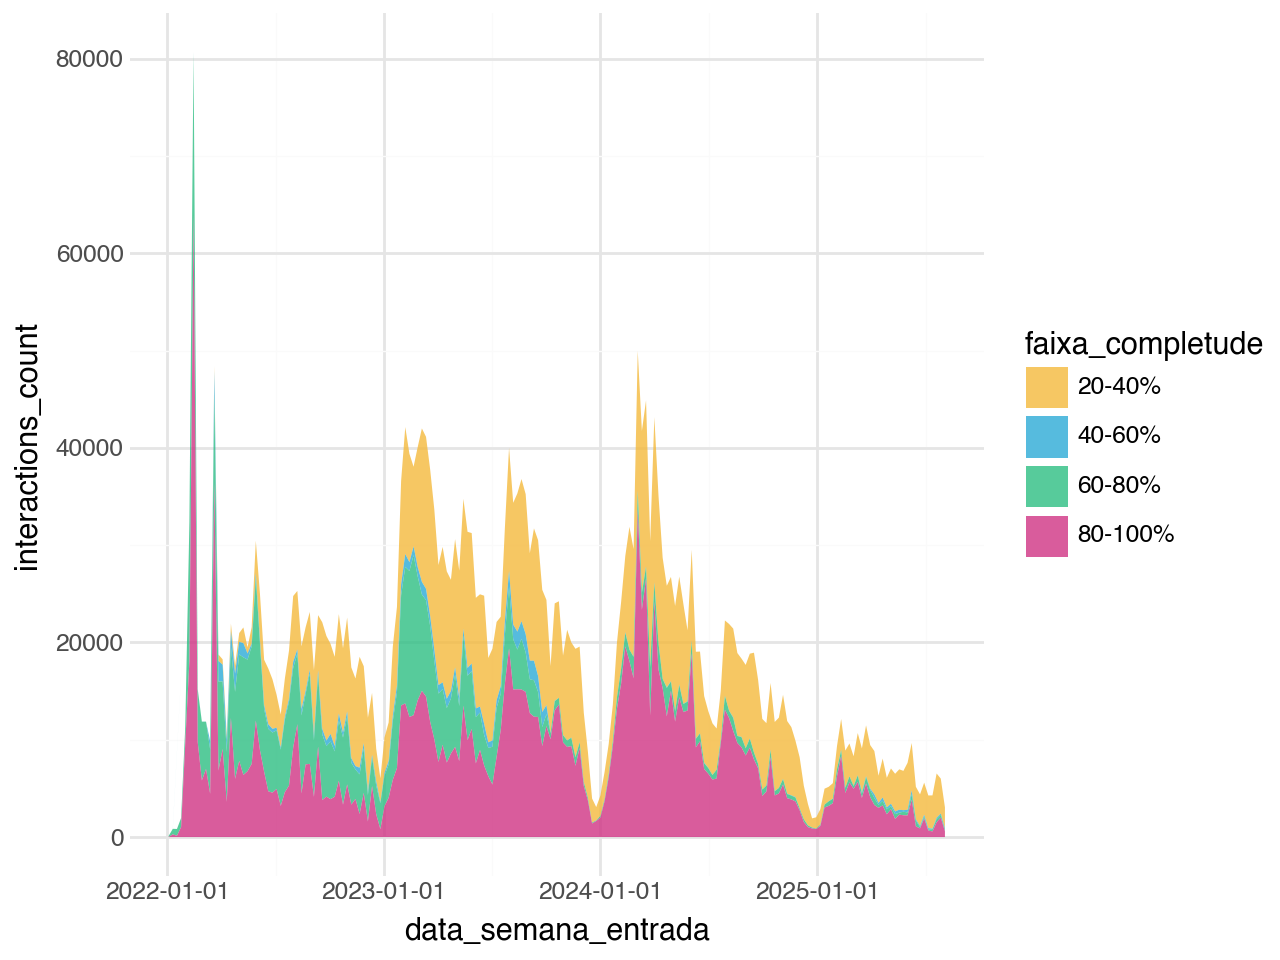

In [17]:
plot = (
    p9.ggplot(interacoes_data, p9.aes(x='data_semana_entrada', y='interactions_count', fill='faixa_completude')) +
    p9.geom_area(position='stack', alpha=0.8) +
    p9.scale_fill_manual(values=cor_completude_map) +
    p9.theme_minimal()
)

plot

In [30]:
teachers_interactions = fct_teachers_contents_interactions.merge(teachers, on='unique_id', how='inner')
teachers_interactions.shape

(3617627, 27)

In [31]:
teachers_interactions.columns.tolist()

['unique_id',
 'user_type',
 'user_agent_device_type',
 'data_inicio',
 'event_type',
 'content_type',
 'id_aula',
 'utm_source',
 'profid',
 'utm_origin',
 'tela_origem',
 'estado',
 'total_alunos',
 'login_google',
 'currentstage',
 'currentsubject',
 'selectedstages',
 'selectedsubjectsem',
 'selectedsubjectsfundii',
 'visualizou_metodologia_ativa',
 'data_entrada',
 'colunas_preenchidas',
 'data_semana_entrada',
 'faixa_completude',
 'cor_completude',
 'interactions_count',
 'usuario_valido']

In [32]:
columns_to_drop = ['data_semana_entrada', 'cor_completude', 'interactions_count']
teachers_interactions = teachers_interactions.drop(columns=columns_to_drop)

In [33]:
teachers_interactions.head()

,unique_id,user_type,user_agent_device_type,data_inicio,event_type,content_type,id_aula,utm_source,profid,utm_origin,...,currentstage,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas,faixa_completude,usuario_valido
0,599e78c8-a3ed-4a43-bf99-9ceb012079e4,registered,None,2024-05-19 18:26:22.525000+00:00,criacao_turma_relatorio,relatorio,None,None,599e78c8-a3ed-4a43-bf99-9ceb012079e4,SEO Orgânico,...,em,6,"[em, fundii]","[1, 3, 4, 8, 2, 6]","[1, 2, 5, 6]",NaN,2024-04-19 23:01:27.839000+00:00,0.928571,80-100%,True
1,794850fa-e0a3-4bdb-821a-32fb8657e981,registered,None,2024-02-07 22:37:41.864000+00:00,criacao_anotacao_relatorio,relatorio,None,None,794850fa-e0a3-4bdb-821a-32fb8657e981,Landing Page,...,fundii,5,"[em, fundii]","[6, 8, 7, 5, 4, 3, 2, 1]","[7, 6, 5, 4, 3, 2, 1]",1.0,2023-09-20 15:55:46.957000+00:00,1.000000,80-100%,True
2,b507b6b4-21c3-4f93-9126-7341040579aa,registered,None,2024-03-27 06:53:24.246000+00:00,criacao_anotacao_relatorio,relatorio,None,None,b507b6b4-21c3-4f93-9126-7341040579aa,Landing Page,...,fundii,1,"[em, fundii]","[1, 6]",[1],1.0,2022-07-02 14:23:25.612000+00:00,1.000000,80-100%,True
3,707c5747-f213-402f-896b-f8129fe36910,registered,None,2024-04-01 17:23:51.336000+00:00,criacao_anotacao_relatorio,relatorio,None,None,None,Não identificado,...,None,None,None,None,None,NaN,2024-04-01 17:23:50.457000+00:00,0.285714,20-40%,False
4,707c5747-f213-402f-896b-f8129fe36910,registered,None,2024-04-02 11:41:33.447000+00:00,criacao_anotacao_relatorio,relatorio,None,None,None,Não identificado,...,None,None,None,None,None,NaN,2024-04-01 17:23:50.457000+00:00,0.285714,20-40%,False


In [34]:
teachers_interactions['data_inicio'] = pd.to_datetime(teachers_interactions['data_inicio'])
teachers_interactions['data_semana_inicio'] = teachers_interactions['data_inicio'].dt.date - pd.to_timedelta(teachers_interactions['data_inicio'].dt.weekday, unit='d')
teachers_interactions.head()

/var/folders/kd/9dcr76gj6r54_pq8wpxx3k300000gn/T/ipykernel_91822/3439638110.py:2: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.


,unique_id,user_type,user_agent_device_type,data_inicio,event_type,content_type,id_aula,utm_source,profid,utm_origin,...,currentsubject,selectedstages,selectedsubjectsem,selectedsubjectsfundii,visualizou_metodologia_ativa,data_entrada,colunas_preenchidas,faixa_completude,usuario_valido,data_semana_inicio
0,599e78c8-a3ed-4a43-bf99-9ceb012079e4,registered,None,2024-05-19 18:26:22.525000+00:00,criacao_turma_relatorio,relatorio,None,None,599e78c8-a3ed-4a43-bf99-9ceb012079e4,SEO Orgânico,...,6,"[em, fundii]","[1, 3, 4, 8, 2, 6]","[1, 2, 5, 6]",NaN,2024-04-19 23:01:27.839000+00:00,0.928571,80-100%,True,2024-05-13
1,794850fa-e0a3-4bdb-821a-32fb8657e981,registered,None,2024-02-07 22:37:41.864000+00:00,criacao_anotacao_relatorio,relatorio,None,None,794850fa-e0a3-4bdb-821a-32fb8657e981,Landing Page,...,5,"[em, fundii]","[6, 8, 7, 5, 4, 3, 2, 1]","[7, 6, 5, 4, 3, 2, 1]",1.0,2023-09-20 15:55:46.957000+00:00,1.000000,80-100%,True,2024-02-05
2,b507b6b4-21c3-4f93-9126-7341040579aa,registered,None,2024-03-27 06:53:24.246000+00:00,criacao_anotacao_relatorio,relatorio,None,None,b507b6b4-21c3-4f93-9126-7341040579aa,Landing Page,...,1,"[em, fundii]","[1, 6]",[1],1.0,2022-07-02 14:23:25.612000+00:00,1.000000,80-100%,True,2024-03-25
3,707c5747-f213-402f-896b-f8129fe36910,registered,None,2024-04-01 17:23:51.336000+00:00,criacao_anotacao_relatorio,relatorio,None,None,None,Não identificado,...,None,None,None,None,NaN,2024-04-01 17:23:50.457000+00:00,0.285714,20-40%,False,2024-04-01
4,707c5747-f213-402f-896b-f8129fe36910,registered,None,2024-04-02 11:41:33.447000+00:00,criacao_anotacao_relatorio,relatorio,None,None,None,Não identificado,...,None,None,None,None,NaN,2024-04-01 17:23:50.457000+00:00,0.285714,20-40%,False,2024-04-01


In [37]:
teachers_interactions = teachers_interactions[teachers_interactions['data_inicio'] >= '2022-01-01']
teachers_interactions['data_inicio'].describe()

count                             3616801
mean     2023-11-02 09:50:10.704623+00:00
min      2022-01-03 18:20:59.867000+00:00
25%      2023-03-21 16:45:17.456000+00:00
50%      2023-10-15 16:00:06.057000+00:00
75%      2024-06-17 05:50:28.759000+00:00
max      2025-08-06 18:52:53.143000+00:00
Name: data_inicio, dtype: object

In [43]:
teachers_interactions.to_parquet('../data/teachers_interactions.parquet', index=False)

In [38]:
semanais = teachers_interactions.groupby(['data_semana_inicio', 'faixa_completude']).size().reset_index(name='interactions_count')
semanais

,data_semana_inicio,faixa_completude,interactions_count
0,2022-01-03,60-80%,16
1,2022-01-10,60-80%,54
2,2022-01-17,60-80%,138
3,2022-01-24,60-80%,251
4,2022-01-31,20-40%,50
...,...,...,...
725,2025-07-28,80-100%,6770
726,2025-08-04,20-40%,2405
727,2025-08-04,40-60%,149
728,2025-08-04,60-80%,725


In [40]:
semanais['data_semana_inicio'] = pd.to_datetime(semanais['data_semana_inicio'])

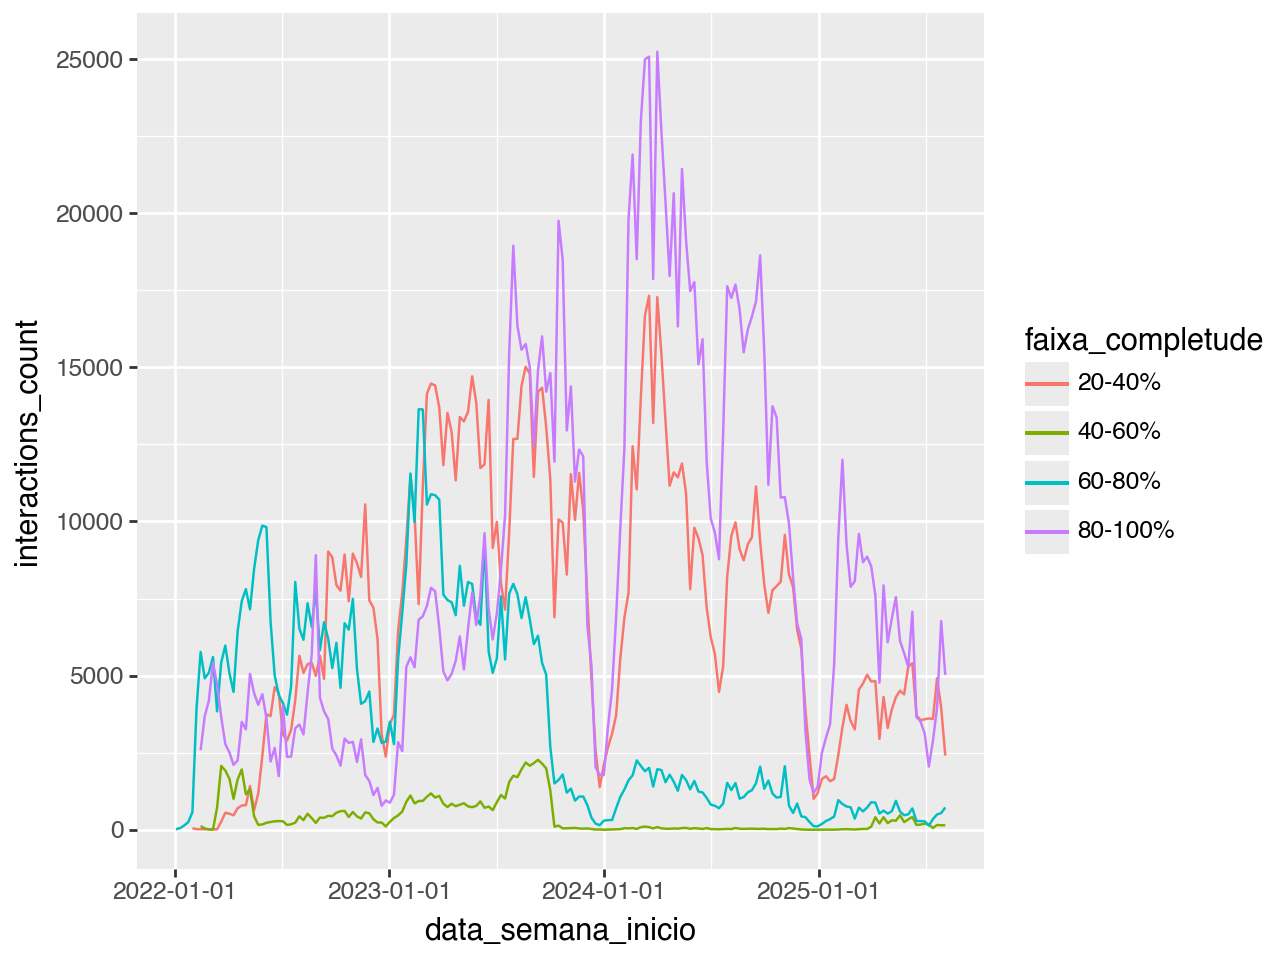

In [42]:
(
    p9.ggplot(semanais, p9.aes(x='data_semana_inicio', y='interactions_count', color='faixa_completude')) +
    p9.geom_line()
)